In [5]:
import pandas as pd 

ppp_path = 'C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/prc_ppp_ind__custom_13338510_linear.csv.gz'
ppp_df = pd.read_csv(ppp_path, compression = 'gzip')
print(ppp_df['na_item'].unique())

ppp_df

['EXP_EUR' 'EXP_EUR_HAB' 'EXP_NAC' 'EXP_NAC_PC_GDP' 'EXP_PPS_EU15'
 'EXP_PPS_EU15_HAB' 'EXP_PPS_EU27_2007' 'EXP_PPS_EU27_2007_HAB'
 'EXP_PPS_EU27_2020' 'EXP_PPS_EU27_2020_HAB' 'EXP_PPS_EU28'
 'EXP_PPS_EU28_HAB' 'PLI_EU15' 'PLI_EU27_2007' 'PLI_EU27_2020' 'PLI_EU28'
 'PPP_EU15' 'PPP_EU27_2007' 'PPP_EU27_2020' 'PPP_EU28' 'VI_PPS_EU15_HAB'
 'VI_PPS_EU27_2007_HAB' 'VI_PPS_EU27_2020_HAB' 'VI_PPS_EU28_HAB']


,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,EXP_EUR,GDP,AL,2014,9969.0,NaN
1,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,EXP_EUR,GDP,AL,2015,10264.0,NaN
2,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,EXP_EUR,GDP,AL,2016,10720.0,NaN
3,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,EXP_EUR,GDP,AL,2017,11559.0,NaN
4,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,EXP_EUR,GDP,AL,2018,12828.0,NaN
...,...,...,...,...,...,...,...,...,...
10453,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,VI_PPS_EU28_HAB,GDP,US,2016,141.0,NaN
10454,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,VI_PPS_EU28_HAB,GDP,US,2017,139.0,NaN
10455,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,VI_PPS_EU28_HAB,GDP,US,2018,140.0,NaN
10456,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,VI_PPS_EU28_HAB,GDP,US,2019,135.0,NaN


In [7]:
filtered_ppp_df = ppp_df[ppp_df['na_item'] == 'PPP_EU27_2020']
filtered_ppp_df

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
7890,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2014,59.86150,NaN
7891,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2015,59.41100,NaN
7892,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2016,61.02650,NaN
7893,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2017,61.52950,NaN
7894,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2018,62.39070,NaN
...,...,...,...,...,...,...,...,...,...
8413,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,US,2019,1.53789,NaN
8414,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,US,2020,1.56554,NaN
8415,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,US,2021,1.58586,NaN
8416,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,US,2022,1.61143,NaN


In [25]:
# Step 1: Filter rows where 'stk_flow' is 'STK_CL'
# filtered_ppp_df = filtered_ppp_df[filtered_ppp_df['stk_flow'] == 'STK_CL']

# Step 2: Extract the year from the 'TIME_PERIOD' column (assuming the year is in the first 4 characters)
filtered_ppp_df['YEAR'] = filtered_ppp_df['TIME_PERIOD'].astype(str).str[:4].astype(int)

# Step 3: Filter out all rows with the year 2022
filtered_ppp_df = filtered_ppp_df[filtered_ppp_df['YEAR']  < 2022]

# Step 4: Find the latest year for each unique 'geo' value
latest_year_df = filtered_ppp_df.loc[filtered_ppp_df.groupby('geo')['YEAR'].idxmax()]

# Step 5: Drop the 'YEAR' column if not needed
result_df = latest_year_df.drop(columns=['YEAR'])


result_df['geo'] = result_df['geo'].replace('BA', 'BH')

# Display the filtered DataFrame
result_df.head()

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
7897,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2021,64.37670,NaN
7907,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AT,2021,1.13146,NaN
7917,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BH,2021,1.03161,NaN
7927,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BE,2021,1.11940,NaN
7937,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BG,2021,1.08975,NaN


In [ ]:
# After lunch
# select all the naturaconnect countries from the ppp list
natcon_countries ='C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/natcon_countries.csv'
natcon_countries_df = pd.read_csv(natcon_countries)
ppp_natcon_countries = result_df.merge(natcon_countries_df, on = 'geo')
ppp_natcon_countries.head()

In [ ]:
ppp_natcon_countries_missing = ['AN','LI','SM','XK','VA']
new_rows = pd.DataFrame({'geo': ppp_natcon_countries_missing})
ppp_natcon_countries_plus_outliers = pd.concat([ppp_natcon_countries, new_rows], ignore_index=True)
ppp_natcon_countries_plus_outliers.head()

In [32]:
ppp_natcon_countries_plus_outliers['AverageSource'] = 'None'
ppp_natcon_countries_plus_outliers.head()

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Country_Code,AverageSource
0,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2021.0,64.37670,NaN,ALB,None
1,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AT,2021.0,1.13146,NaN,AUT,None
2,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BH,2021.0,1.03161,NaN,BIH,None
3,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BE,2021.0,1.11940,NaN,BEL,None
4,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BG,2021.0,1.08975,NaN,BGR,None


In [ ]:

# add the 2021 currency exchange rates to df available from column I of spreadsheet: 'C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/PPP_values_OECD.xlsx'

# As: (from metadata of eurostat) Purchasing power parities (PPPs) scaled to the sum of expenditures of the EU Member States expressed in euro. This means that the PPP of one particular country indicates how many units of national currency one would need in that country in order to maintain the purchasing power of one euro in the EU
# apply the currency exchange rates to the ppp list
# add the new ppp list to the PPP_on_ref_vec.py script

# then change the CLC mosaic classes 
# then run the forestry oppoprtunity cost analysis again with new clc mosaic calculations
# and for arable land
# and for pastoral land
# and for urban land?




In [ ]:
# exchange rates from https://doi.org/10.2908/TEIMF200 and AL(https://www.bankofalbania.org/Markets/Official_exchange_rate/Exchage_rate_archive/) = C:\Users\spencerd\Documents\NaturaConnect\Spatial datasets\European countries\Input_datasets\KK_2021_20476_albania_exchange_rate_2021_eur.xlsx
exchange_rates = {
    'AL': 122.46087,
 'BG':1.9558,
 'CZ':25.640,
 'DK':7.4370,
 'HU':358.52,
 'PL':4.5652,
 'RO':4.9215,
 'SE':10.1465,
 'UK':0.8596,
 'BH':1.95583,
 'MK':61.6360,
 'RS':117.5733,
 'NO':10.1633,
 'CH': 1.0811
}

df =ppp_natcon_countries_plus_outliers
# Add a new 'exchange_rate' column by mapping 'geo' values to the exchange rates
df['exchange_rate'] = df['geo'].map(exchange_rates).fillna(1)
df

In [55]:
df['exRate_corrected_PPP'] = df['OBS_VALUE']/df['exchange_rate']
df.head()

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Country_Code,AverageSource,exchange_rate,exRate_corrected_PPP
0,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AL,2021.0,64.37670,NaN,ALB,None,122.46087,0.525692
1,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,AT,2021.0,1.13146,NaN,AUT,None,1.00000,1.131460
2,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BH,2021.0,1.03161,NaN,BIH,None,1.95583,0.527454
3,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BE,2021.0,1.11940,NaN,BEL,None,1.00000,1.119400
4,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,BG,2021.0,1.08975,NaN,BGR,None,1.95580,0.557189


In [ ]:

# Step 2: Extract the year from the 'TIME_PERIOD' column (assuming the year is in the first 4 characters)
exchange_rate['YEAR'] = exchange_rate['TIME_PERIOD'].astype(str).str[:4].astype(int)

# Step 3: Filter out all rows with the year 2022
exchange_rate = exchange_rate[exchange_rate['YEAR']  < 2022]

# Step 4: Find the latest year for each unique 'geo' value
latest_year_df = exchange_rate.loc[exchange_rate.groupby('geo')['YEAR'].idxmax()]

# Step 5: Drop the 'YEAR' column if not needed
exchange_rater_df = latest_year_df.drop(columns=['YEAR'])


exchange_rater_df['geo'] = exchange_rater_df['geo'].replace('BA', 'BH')

# Display the filtered DataFrame
exchange_rater_df.head()

C:\Users\spencerd\AppData\Local\Temp\ipykernel_21084\2495615014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='geo', y='exRate_corrected_PPP', data=df, palette='viridis')


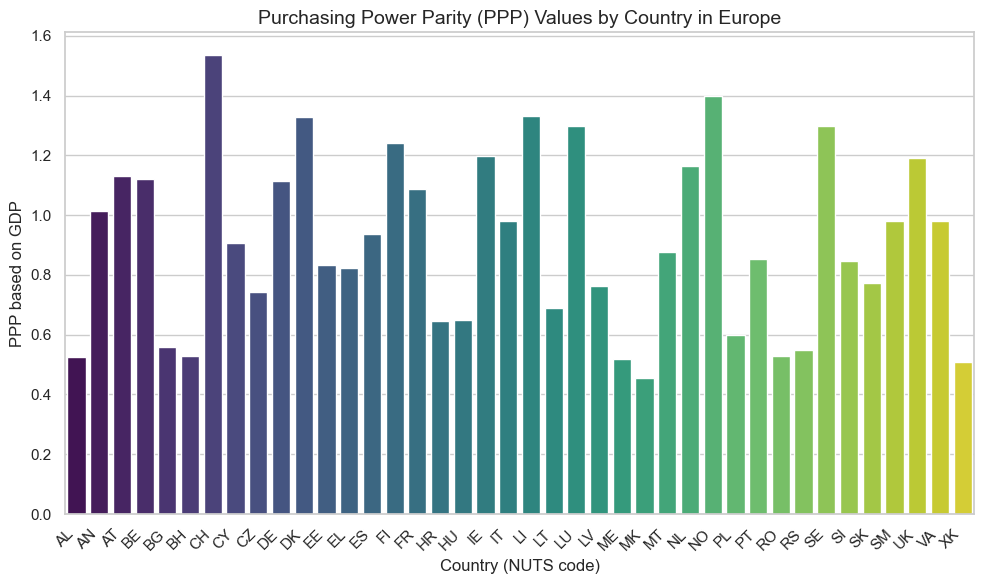

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(by='geo')
# Set the style and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a barplot
sns.barplot(x='geo', y='exRate_corrected_PPP', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Country (NUTS code)', fontsize=12)
plt.ylabel('PPP based on GDP', fontsize=12)
plt.title('Purchasing Power Parity (PPP) Values by Country in Europe', fontsize=14)

# Rotate the x-axis labels and give them more space
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

# Adjust the space to prevent label overlap
plt.tight_layout()
plt.savefig('C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Cartographs/Paper figures/PPP_values_by_country.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [60]:
df

# Calculate the average between 'ES' and 'FR' in the 'exRate_corrected_PPP' column
average_value = df.loc[df['geo'].isin(['ES', 'FR']), 'exRate_corrected_PPP'].mean()

# Assign the average value to the row where 'geo' == 'AN'
df.loc[df['geo'] == 'AN', 'exRate_corrected_PPP'] = average_value


# Calculate the average between 'ES' and 'FR' in the 'exRate_corrected_PPP' column
average_value = df.loc[df['geo'].isin(['AT', 'CH']), 'exRate_corrected_PPP'].mean()

# Assign the average value to the row where 'geo' == 'AN'
df.loc[df['geo'] == 'LI', 'exRate_corrected_PPP'] = average_value


# Calculate the average between 'ES' and 'FR' in the 'exRate_corrected_PPP' column
average_value = df.loc[df['geo'].isin(['IT']), 'exRate_corrected_PPP'].mean()

# Assign the average value to the row where 'geo' == 'AN'
df.loc[df['geo'] == 'VA', 'exRate_corrected_PPP'] = average_value
df.loc[df['geo'] == 'SM', 'exRate_corrected_PPP'] = average_value

# Calculate the average between 'ES' and 'FR' in the 'exRate_corrected_PPP' column
average_value = df.loc[df['geo'].isin(['RS', 'AL', 'MK']), 'exRate_corrected_PPP'].mean()

# Assign the average value to the row where 'geo' == 'AN'
df.loc[df['geo'] == 'XK', 'exRate_corrected_PPP'] = average_value

df.tail()

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Country_Code,AverageSource,exchange_rate,exRate_corrected_PPP
35,NaN,NaN,NaN,NaN,NaN,AN,NaN,NaN,NaN,NaN,None,1.0,1.012440
36,NaN,NaN,NaN,NaN,NaN,LI,NaN,NaN,NaN,NaN,None,1.0,1.333263
37,NaN,NaN,NaN,NaN,NaN,SM,NaN,NaN,NaN,NaN,None,1.0,0.979154
38,NaN,NaN,NaN,NaN,NaN,XK,NaN,NaN,NaN,NaN,None,1.0,0.510215
39,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,NaN,NaN,None,1.0,0.979154


In [69]:
ppp_eurostat_path = 'C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/PPP_eurostat_albania.csv'
df.to_csv(ppp_eurostat_path)


In [68]:
df.tail()

,DATAFLOW,LAST UPDATE,freq,na_item,ppp_cat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Country_Code,AverageSource,exchange_rate,exRate_corrected_PPP
33,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,SK,2021.0,0.772257,NaN,SVK,None,1.0000,0.772257
37,NaN,NaN,NaN,NaN,NaN,SM,NaN,NaN,NaN,NaN,None,1.0000,0.979154
34,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,A,PPP_EU27_2020,GDP,UK,2021.0,1.022630,NaN,GBR,None,0.8596,1.189658
39,NaN,NaN,NaN,NaN,NaN,VA,NaN,NaN,NaN,NaN,None,1.0000,0.979154
38,NaN,NaN,NaN,NaN,NaN,XK,NaN,NaN,NaN,NaN,None,1.0000,0.510215


In [2]:
import geopandas as gpd
import pandas as pd

version = 'oct_24__'
## add the ppp values onto the ref vector then rasterise

# read paths
IN_ref_mar = "C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/NUTS_regions_missing_countries/reference_vector_feb_24/reference_vector_mar_24_cleaned.shp"
IN_ppp = 'C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/PPP_eurostat_albania.csv'

OUT_ref_mar = f"C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/NUTS_regions_missing_countries/reference_vector_feb_24/{version}PPP__reference_vector_mar_24_cleaned.shp"

# read files
ref_vec = gpd.read_file(IN_ref_mar)
ppp_table = pd.read_csv(IN_ppp)

ppp_table = ppp_table.rename(columns = {'geo':'CNTR_COD_1'})

# ref_vec.columns
# *reflist, datatype = ref_vec['CNTR_COD_1'].unique()
# len(reflist)
# reflist.sort()
# ppp_list = ppp_table['CNTR_CODE'].tolist()

# merge datasets
merge_vec_ppp = ref_vec.merge(ppp_table, on ='CNTR_COD_1')

merge_vec_ppp.to_file(OUT_ref_mar)
merge_vec_ppp

C:\Users\spencerd\AppData\Local\Temp\ipykernel_14156\1010588575.py:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merge_vec_ppp.to_file(OUT_ref_mar)


,NUTS_ID__2,LEVL_COD_1,CNTR_COD_1,NAME_LAT_1,NUTS_NAM_1,layer_2_2_,path_2_2_2,geometry,Unnamed: 0,DATAFLOW,...,freq,na_item,ppp_cat,TIME_PERIOD,OBS_VALUE,OBS_FLAG,Country_Code,AverageSource,exchange_rate,exRate_corrected_PPP
0,HR03,2.0,HR,Jadranska Hrvatska,Jadranska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,"MULTIPOLYGON (((5014573.760 2200024.631, 50142...",15,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,0.646175,NaN,HRV,NaN,1.0000,0.646175
1,HR02,2.0,HR,Panonska Hrvatska,Panonska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,"MULTIPOLYGON (((4774661.842 2444975.302, 47746...",15,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,0.646175,NaN,HRV,NaN,1.0000,0.646175
2,HR03,2.0,HR,Jadranska Hrvatska,Jadranska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,"MULTIPOLYGON (((5014814.867 2199304.786, 50148...",15,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,0.646175,NaN,HRV,NaN,1.0000,0.646175
3,HR02,2.0,HR,Panonska Hrvatska,Panonska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,"POLYGON ((4886261.148 2568903.120, 4886997.674...",15,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,0.646175,NaN,HRV,NaN,1.0000,0.646175
4,HR06,2.0,HR,Sjeverna Hrvatska,Sjeverna Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,"POLYGON ((4885838.460 2569452.540, 4885319.348...",15,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,0.646175,NaN,HRV,NaN,1.0000,0.646175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,CH057,3.0,CH,Thurgau,Thurgau,None,None,"MULTIPOLYGON (((4225200.367 2731823.820, 42254...",5,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,1.659560,NaN,CHE,NaN,1.0811,1.535066
325,CH023,3.0,CH,Solothurn,Solothurn,None,None,"MULTIPOLYGON (((4167686.918 2707521.480, 41681...",5,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,1.659560,NaN,CHE,NaN,1.0811,1.535066
326,CH013,3.0,CH,GenÃ¨ve,GenÃ¨ve,None,None,"MULTIPOLYGON (((4029619.317 2585045.518, 40296...",5,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,1.659560,NaN,CHE,NaN,1.0811,1.535066
327,CH012,3.0,CH,Valais,Valais,None,None,"POLYGON ((4203491.564 2601962.960, 4203176.113...",5,ESTAT:PRC_PPP_IND(1.0),...,A,PPP_EU27_2020,GDP,2021.0,1.659560,NaN,CHE,NaN,1.0811,1.535066


In [8]:

###
## use ref vector to rasterise.
###

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
import numpy as np
from numpy import int16
from numpy import float32
from numpy import inf

project_path = "C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries"

# static paths
IN_lulc = "C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/New LULC map/Nov23_EU_landSystem.tif"

# IN_combination_raster_without_0 = project_path + '/Input_datasets/hrl_combi_step/combined_new_LULC.tif' #clipped in QGIS

IN_combination_raster = "c:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Throughput_datasets/rasterized_land_rents/oct_24__CLC_combined_allocated_rents_masked.tif"

# dynamic paths
IN_vector = OUT_ref_mar
OUT_PPP_raster =  project_path + f'/Input_datasets/hrl_combi_step/PPP_standardisation/{version}averaged_ppp_standardise.tif'
OUT_PPP_rents_raster =  project_path + f'/Input_datasets/hrl_combi_step/PPP_standardisation/{version}averaged_ppp_under_standardisation_rents.tif'


# Read in vector ##
# Hashed out so that we can include the production values in Cyprus from the Verkerk map
vector = gpd.read_file(OUT_ref_mar)


vector.head()


,NUTS_ID__2,LEVL_COD_1,CNTR_COD_1,NAME_LAT_1,NUTS_NAM_1,layer_2_2_,path_2_2_2,Unnamed_ 0,DATAFLOW,LAST UPDAT,...,na_item,ppp_cat,TIME_PERIO,OBS_VALUE,OBS_FLAG,Country_Co,AverageSou,exchange_r,exRate_cor,geometry
0,HR03,2.0,HR,Jadranska Hrvatska,Jadranska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,15,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,...,PPP_EU27_2020,GDP,2021.0,0.646175,None,HRV,None,1.0,0.646175,"MULTIPOLYGON (((5014573.760 2200024.631, 50142..."
1,HR02,2.0,HR,Panonska Hrvatska,Panonska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,15,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,...,PPP_EU27_2020,GDP,2021.0,0.646175,None,HRV,None,1.0,0.646175,"MULTIPOLYGON (((4774661.842 2444975.302, 47746..."
2,HR03,2.0,HR,Jadranska Hrvatska,Jadranska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,15,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,...,PPP_EU27_2020,GDP,2021.0,0.646175,None,HRV,None,1.0,0.646175,"MULTIPOLYGON (((5014814.867 2199304.786, 50148..."
3,HR02,2.0,HR,Panonska Hrvatska,Panonska Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,15,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,...,PPP_EU27_2020,GDP,2021.0,0.646175,None,HRV,None,1.0,0.646175,"POLYGON ((4886261.148 2568903.120, 4886997.674..."
4,HR06,2.0,HR,Sjeverna Hrvatska,Sjeverna Hrvatska,NUTS2_RG_01M_2021_3035,C:/Users/spencerd/Documents/NUTS2_RG_01M_2021_...,15,ESTAT:PRC_PPP_IND(1.0),08/08/24 23:00:00,...,PPP_EU27_2020,GDP,2021.0,0.646175,None,HRV,None,1.0,0.646175,"POLYGON ((4885838.460 2569452.540, 4885319.348..."


In [9]:

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

# # Open example raster
reference_raster = rasterio.open(IN_lulc)

burn_value = vector['exRate_cor']

# Get list of geometries for all features in vector file
geom = [shapes for shapes in vector.geometry]

# Open example raster
raster = rasterio.open(IN_lulc)

# create tuples of geometry, value pairs, where value is the attribute value you want to burn

geom_value = ((geom,value) for geom, value in zip(vector.geometry, burn_value))

# Rasterize vector using the shape and transform of the raster
rasterized = features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = False,
                                fill = -99,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = float)


# save the rasterized vector out
with rasterio.open(
        OUT_PPP_raster, "w",
        driver = "GTiff",
        crs = raster.crs,
        transform = raster.transform,
        dtype = rasterio.float32,
        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    dst.write(rasterized, indexes = 1)
# save the rasterized vector out


print(f"rasterisation of PPP values available at {OUT_PPP_raster}")


###
## Use PPP raster and combination raster to get ppp standardised raster
###

with rasterio.open(OUT_PPP_raster) as src1, rasterio.open(IN_combination_raster) as src2:
        # Lees metadata van één invoerraster (ervan uitgaande dat beide rasters dezelfde metadata hebben)
        meta = src1.meta.copy()

        # Werk metadata bij voor het uitvoerraster
        meta.update(driver='GTiff', dtype='float32')

        # Maak uitvoerrasterbestand aan
        uitvoer_pad = OUT_PPP_rents_raster
        with rasterio.open(uitvoer_pad, 'w', **meta) as dst:

            # Voer de vermenigvuldiging uit op de invoerrasters
            PPP = src1.read(1)  # Lees eerste band van raster1
            combination = src2.read(1)  # Lees eerste band van raster2

            PPPstandard = combination/PPP

            # Schrijf het resultaat naar het uitvoerrasterbestand
            dst.write(PPPstandard, 1)  # Schrijf het resultaat naar de eerste band

print(f"combination raster is succesvol geschreven to {OUT_PPP_rents_raster}.")



rasterisation of PPP values available at C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/hrl_combi_step/PPP_standardisation/oct_24__averaged_ppp_standardise.tif
combination raster is succesvol geschreven to C:/Users/spencerd/Documents/NaturaConnect/Spatial datasets/European countries/Input_datasets/hrl_combi_step/PPP_standardisation/oct_24__averaged_ppp_under_standardisation_rents.tif.
